**Data** **Preparation**



# Need of Pre-Processing

# Tabular data Pre-processing  

- Structured data - Tabular data
- Semistructured data - Json data
- Unstructured data - Text file

# Exploratory Data Analysis [EDA] on Titanic Dataset



: Feature Engineering
- Data Pre-processing and
- **Exploratory Data Analysis [EDA]**
- **Data Visualization**
- Feature Extraction
- Feature Selection



**DATASET:** [https://www.kaggle.com/c/titanic/overview ]

## Data reading and setup

In [ ]:
### Titanic Dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style


In [ ]:
test_df = pd.read_csv("tested.csv")
train_df = pd.read_csv("tested.csv")

In [ ]:
train_df.info()

In [ ]:
total = train_df.isnull().sum()
total

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) #rounds the values in percent_1 to one decimal place and sorts them in descending order.
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [ ]:
# Check if there are any duplicates
train_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [ ]:
# Drop Duplicates
train_df.drop_duplicates(inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Check if there is any missing data
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


# METHOD-1: TO DROP NaN values
# METHOD-2: TO fill NaN values with 0

In [ ]:
train_df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [ ]:
# Fill missing data with 0
train_df.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [ ]:
train_df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


**Spend some time with data**


**Features from Dataset**
- survival:    Survival [0 = No, 1 = Yes]
- PassengerId: Unique Id of a passenger.
- pclass:    Ticket class [ 1 = 1st, 2 = 2nd, 3 = 3rd]    
- sex:    Sex     
- Age:    Age in years     
- sibsp:    # of siblings / spouses aboard the Titanic     
- parch:    # of parents / children aboard the Titanic     
- ticket:    Ticket number     
- fare:    Passenger fare     
- cabin:    Cabin number     
- embarked:    Port of Embarkation - [C = Cherbourg, Q = Queenstown, S = Southampton]

In [ ]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [ ]:
# Fill missing data with 0
train_df.fillna(0,inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [ ]:
train_df.dropna(inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [ ]:
train_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [ ]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,0,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,0,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,0,S


+ Catogrical Values
+ Different scale of numeric data
+ Missing values

### Missing Values

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


# EDA : Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations[]


Age vs Sex vs Survival

In [ ]:
# survived = 'survived'
# not_survived = 'not survived'
# fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
# women =train_df[train_df['Sex']=='female']
# men = train_df[train_df['Sex']=='male']
# # Using histplot for histograms
# sns.histplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label=survived, kde=False, ax=axes[0])
# sns.histplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, kde=False, ax=axes[0])
# axes[0].legend()
# axes[0].set_title('Female')

# # Using histplot for histograms
# sns.histplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label=survived, kde=False, ax=axes[1])
# sns.histplot(men[men['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, kde=False, ax=axes[1])
# axes[1].legend()
# axes[1].set_title('Male')

# plt.show()
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,"Kelly, James",0,5,0,0,0,2,0,1,8,1,15,0
1,1,3,"Wilkes, James (Ellen Needs)",1,6,1,0,0,0,1,0,8,3,18,0
2,0,2,"Myles, Thomas Francis",0,6,0,0,1,2,0,1,8,1,12,1
3,0,3,"Wirz, Albert",0,3,0,0,1,0,0,1,8,1,9,1
4,1,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,2,1,1,1,0,2,0,8,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Woolf",0,0,0,0,1,0,0,1,8,1,0,1
414,1,1,"Oliva y Ocana, Dona. Fermina",1,5,0,0,4,1,0,1,3,5,5,4
415,0,3,"Saether, Simon Sivertsen",0,5,0,0,0,0,0,1,8,1,15,0
416,0,3,"Ware, Frederick",0,0,0,0,1,0,0,1,8,1,0,1


Embarked vs Pclass vs Sex

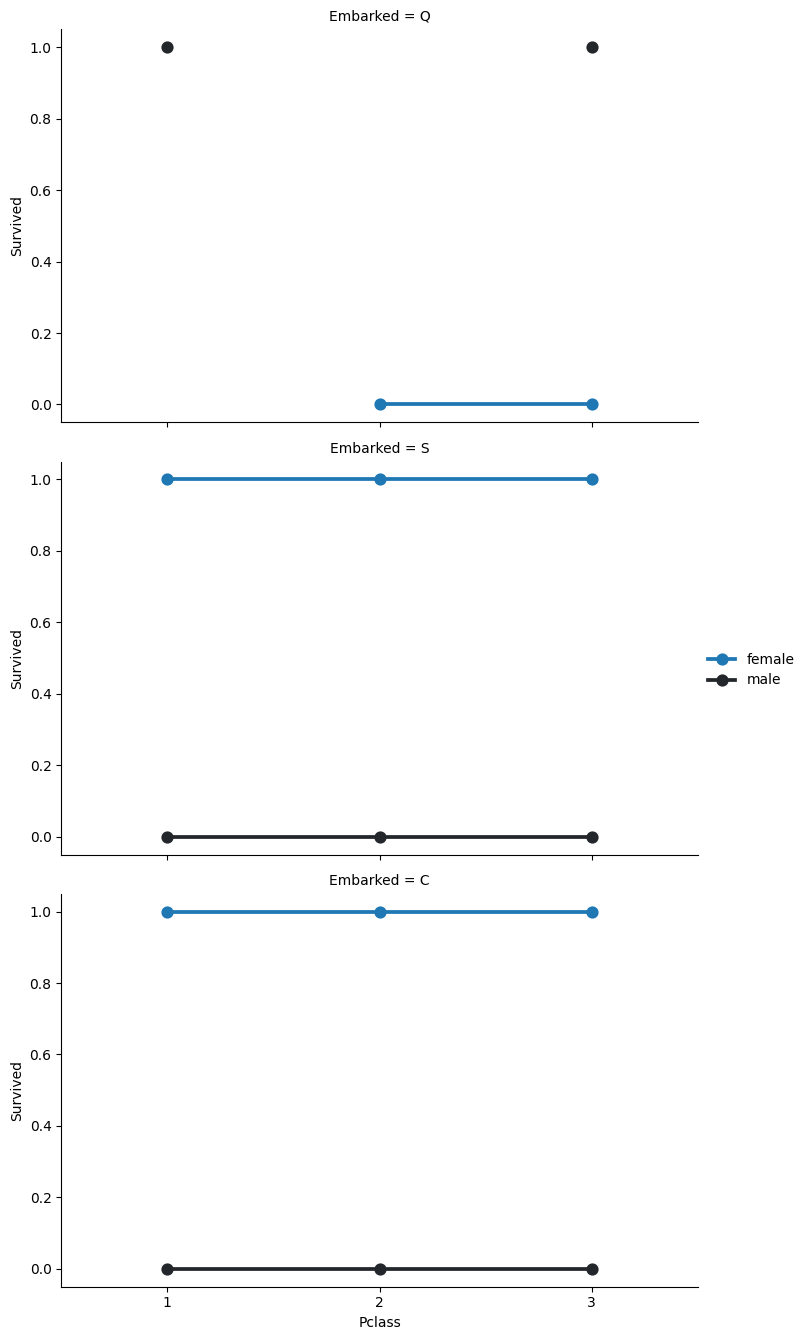

In [ ]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='dark:#1f77b4',  order=None, hue_order=None )
FacetGrid.add_legend()

Pclass

<Axes: xlabel='Pclass', ylabel='Survived'>

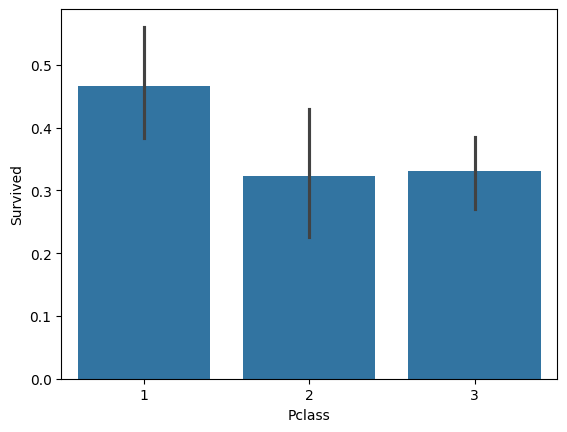

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

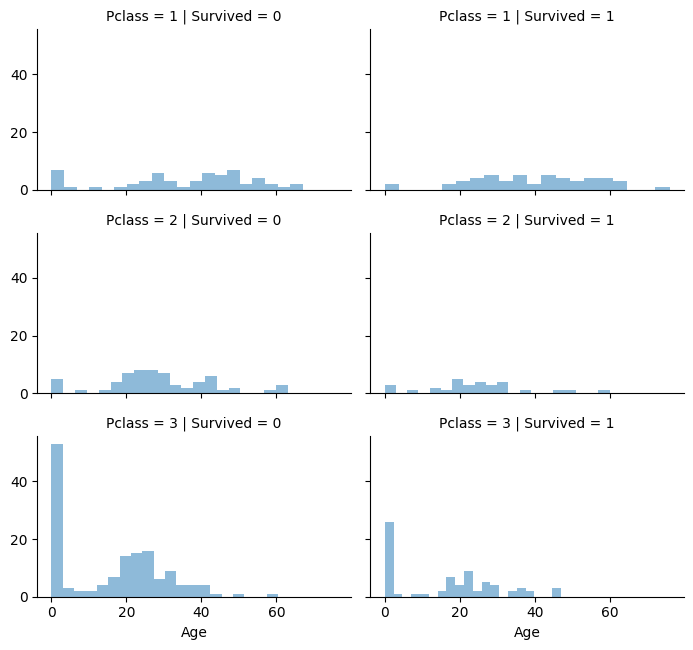

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)

#It plots the distribution of ages ('Age' column) for each combination of 'Survived' and 'Pclass'.
#The alpha parameter controls the transparency of the bars, and bins specifies the number of bins in the histogram.

SibSp and Parch (also some feature engg)

- Creating a new feature called 'relatives' in both the train_df and test_df DataFrames.

- It calculates the total number of relatives for each passenger by summing the 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard) columns.

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,2,0


no of people alone or not

In [ ]:
train_df['not_alone'].value_counts()

1    253
0    165
Name: not_alone, dtype: int64

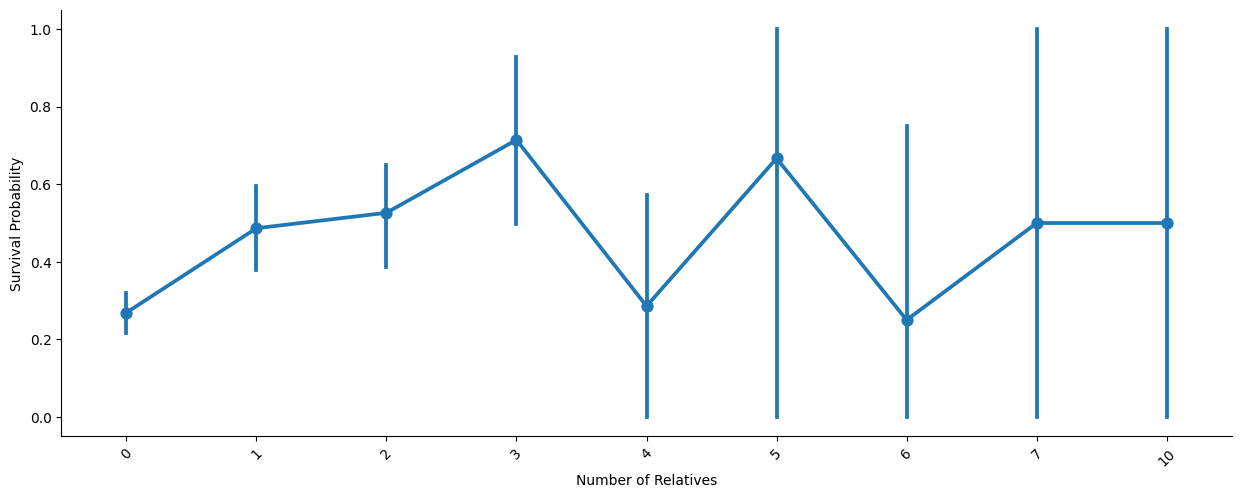

In [ ]:
# Use catplot
g = sns.catplot(x='relatives', y='Survived', data=train_df, aspect=2.5, kind='point')

# You can customize the plot further if needed
g.set_axis_labels('Number of Relatives', 'Survival Probability')
g.set_xticklabels(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


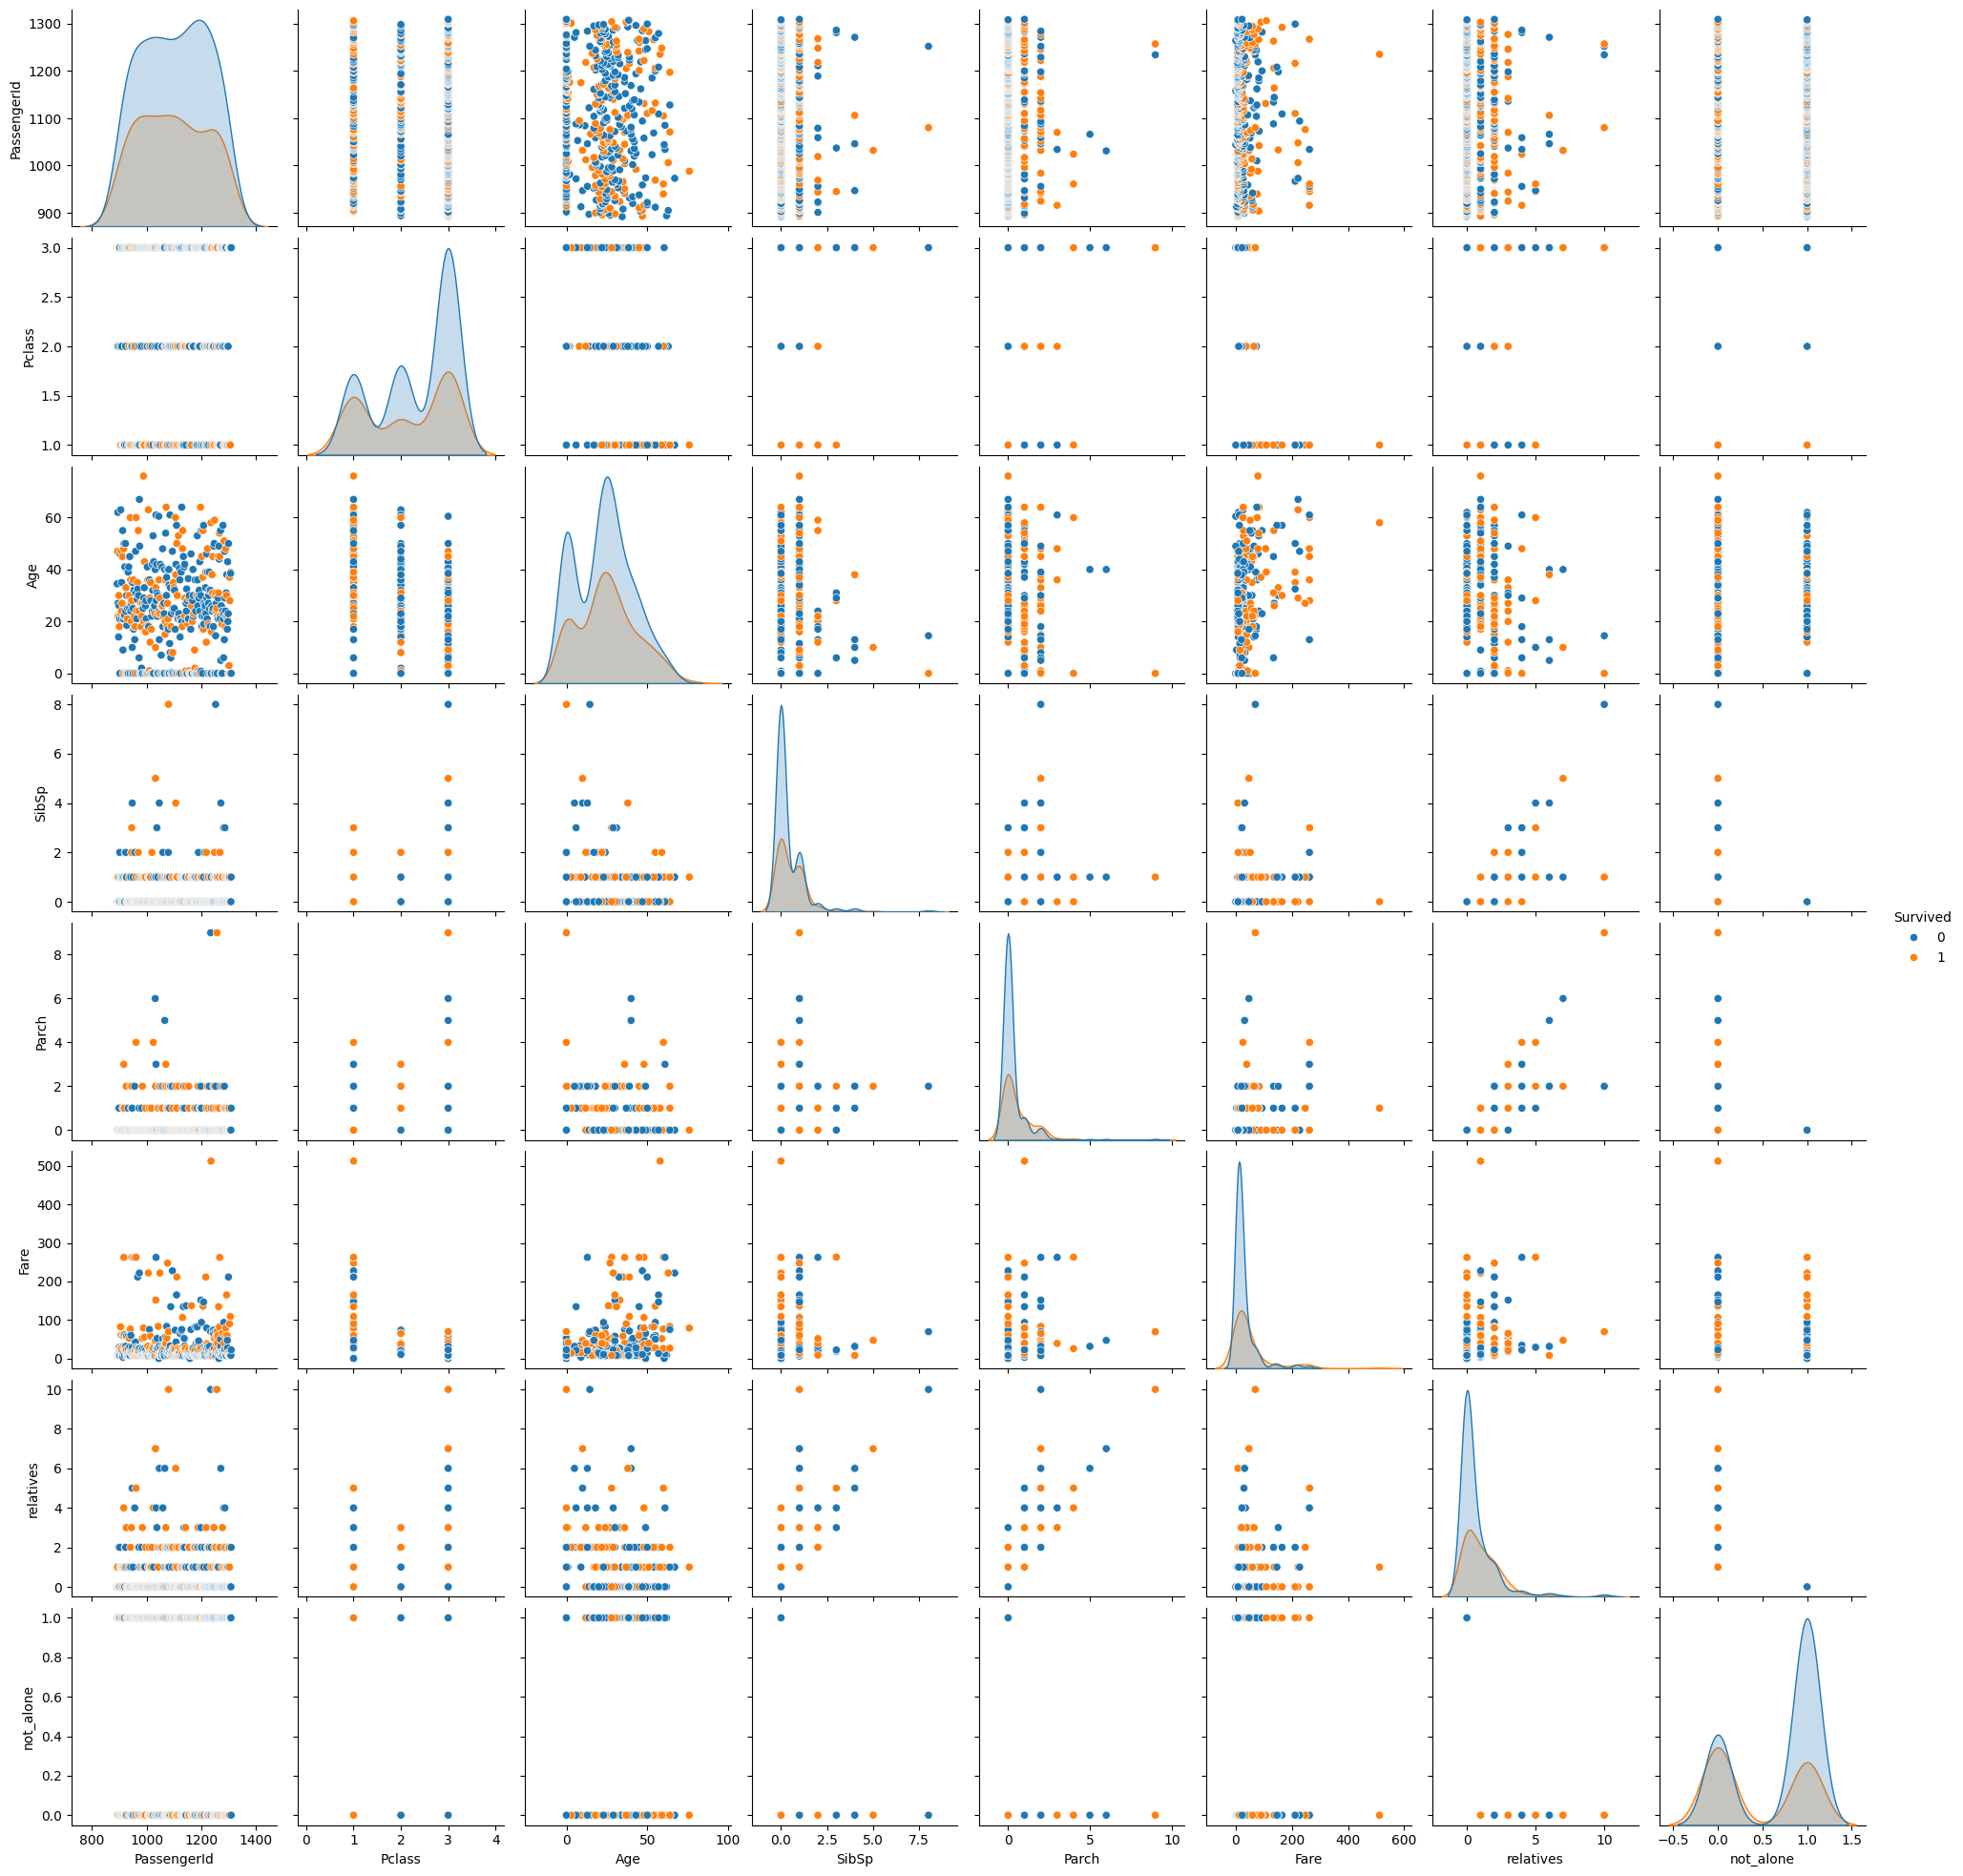

In [ ]:
# df_train_drop = train_df.dropna()

# sns.pairplot(df_train_drop, hue='Survived');
sns.pairplot(train_df, hue='Survived');



# Data preprocessing and Feature Engg

drop passenger ID

In [ ]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1,0
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0,1
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S,0,1
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,1
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0,1
416,0,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S,0,1


Fix cabin

In [ ]:
train_df['Cabin'] #looks like the cabin number - lets convert to deck

0         0
1         0
2         0
3         0
4         0
       ... 
413       0
414    C105
415       0
416       0
417       0
Name: Cabin, Length: 418, dtype: object

In [ ]:
import re

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")

    # Explicitly convert to string and then use apply with a lambda function to handle the extraction
    dataset['Deck'] = dataset['Cabin'].astype(str).apply(lambda x: re.compile("([a-zA-Z]+)").search(x).group() if re.compile("([a-zA-Z]+)").search(x) else "U")

    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
#We take the 'Cabin' information and look for letters in it (like A, B, C, etc.).
#This information is assumed to represent the deck where the passenger's cabin is located.
#If we find a letter, we use it as the deck; otherwise, we set it to "U" (for unknown).


In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0,1,8
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,1,0,8
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0,1,8
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0,1,8
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S,0,1,8
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,1,3
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0,1,8
416,0,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S,0,1,8


In [ ]:
# Now you can drop the 'Cabin' feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)


In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,8
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0,8
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,8
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,8
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,0,8


**Fix** **Age**

**Lets get the mean,std of age and create random ages in the range**

- The process of generating random numbers and filling missing values in the 'Age' column is a technique known as imputation.
- Imputation is used when there are missing values in a dataset, and it involves replacing those missing values with estimated or generated values.
- In this specific case, the goal is to impute missing 'Age' values using random numbers within a certain range.

In [ ]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,0,1,8
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,1,0,8
2,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,0,1,8
3,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,0,1,8
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,2,0,8


**Fix Embarked - only 3 missing so lets do most common**

In [ ]:
train_df['Embarked'].describe()
#top is the mode(most frequently occuring)

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,0,1,8
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,1,0,8
2,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,0,1,8
3,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,0,1,8
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Mr. Woolf",male,0,0,0,A.5. 3236,8.0500,S,0,1,8
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,0,1,3
415,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1,8
416,0,3,"Ware, Mr. Frederick",male,0,0,0,359309,8.0500,S,0,1,8


In [ ]:
train_df['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Embarked, Length: 418, dtype: bool

## Converting Features

Fare - convert to int

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Kelly, Mr. James",male,34,0,0,330911,7,Q,0,1,8
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,S,1,0,8
2,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9,Q,0,1,8
3,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8,S,0,1,8
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,S,2,0,8


Name - Extract Titles from name

In [ ]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', \
                                                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    # Remove titles from 'Name' column
    dataset['Name'] = dataset['Name'].str.replace('Mr\.', '').str.replace('Mrs\.', '').str.replace('Miss\.', '').str.replace('Master\.', '')

    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)

# Display the modified train_df DataFrame
train_df.head()


<ipython-input-52-360e79cae990>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Name'] = dataset['Name'].str.replace('Mr\.', '').str.replace('Mrs\.', '').str.replace('Miss\.', '').str.replace('Master\.', '')
<ipython-input-52-360e79cae990>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Name'] = dataset['Name'].str.replace('Mr\.', '').str.replace('Mrs\.', '').str.replace('Miss\.', '').str.replace('Master\.', '')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,"Kelly, James",male,34,0,0,330911,7,Q,0,1,8,1
1,1,3,"Wilkes, James (Ellen Needs)",female,47,1,0,363272,7,S,1,0,8,3
2,0,2,"Myles, Thomas Francis",male,62,0,0,240276,9,Q,0,1,8,1
3,0,3,"Wirz, Albert",male,27,0,0,315154,8,S,0,1,8,1
4,1,3,"Hirvonen, Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,S,2,0,8,3


In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,"Kelly, James",male,34,0,0,330911,7,Q,0,1,8,1
1,1,3,"Wilkes, James (Ellen Needs)",female,47,1,0,363272,7,S,1,0,8,3
2,0,2,"Myles, Thomas Francis",male,62,0,0,240276,9,Q,0,1,8,1
3,0,3,"Wirz, Albert",male,27,0,0,315154,8,S,0,1,8,1
4,1,3,"Hirvonen, Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,S,2,0,8,3


Sex to numeric

In [ ]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,"Kelly, James",0,34,0,0,330911,7,Q,0,1,8,1
1,1,3,"Wilkes, James (Ellen Needs)",1,47,1,0,363272,7,S,1,0,8,3
2,0,2,"Myles, Thomas Francis",0,62,0,0,240276,9,Q,0,1,8,1
3,0,3,"Wirz, Albert",0,27,0,0,315154,8,S,0,1,8,1
4,1,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,S,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Woolf",0,0,0,0,A.5. 3236,8,S,0,1,8,1
414,1,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108,C,0,1,3,5
415,0,3,"Saether, Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7,S,0,1,8,1
416,0,3,"Ware, Frederick",0,0,0,0,359309,8,S,0,1,8,1


Ticket

In [ ]:
train_df['Ticket'].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

too many unique values...lets drop it

In [ ]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,"Kelly, James",0,34,0,0,7,Q,0,1,8,1
1,1,3,"Wilkes, James (Ellen Needs)",1,47,1,0,7,S,1,0,8,3
2,0,2,"Myles, Thomas Francis",0,62,0,0,9,Q,0,1,8,1
3,0,3,"Wirz, Albert",0,27,0,0,8,S,0,1,8,1
4,1,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,22,1,1,12,S,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Woolf",0,0,0,0,8,S,0,1,8,1
414,1,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,108,C,0,1,3,5
415,0,3,"Saether, Simon Sivertsen",0,38,0,0,7,S,0,1,8,1
416,0,3,"Ware, Frederick",0,0,0,0,8,S,0,1,8,1


Embarked

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports).fillna(0).astype(int)


In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,"Kelly, James",0,34,0,0,7,2,0,1,8,1
1,1,3,"Wilkes, James (Ellen Needs)",1,47,1,0,7,0,1,0,8,3
2,0,2,"Myles, Thomas Francis",0,62,0,0,9,2,0,1,8,1
3,0,3,"Wirz, Albert",0,27,0,0,8,0,0,1,8,1
4,1,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,22,1,1,12,0,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Woolf",0,0,0,0,8,0,0,1,8,1
414,1,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,108,1,0,1,3,5
415,0,3,"Saether, Simon Sivertsen",0,38,0,0,7,0,0,1,8,1
416,0,3,"Ware, Frederick",0,0,0,0,8,0,0,1,8,1


## Creating Categories

Age - convert into buckets... be carefull that number of samples in each class should be kinda equal

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,"Kelly, James",0,5,0,0,7,2,0,1,8,1
1,1,3,"Wilkes, James (Ellen Needs)",1,6,1,0,7,0,1,0,8,3
2,0,2,"Myles, Thomas Francis",0,6,0,0,9,2,0,1,8,1
3,0,3,"Wirz, Albert",0,3,0,0,8,0,0,1,8,1
4,1,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,2,1,1,12,0,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Woolf",0,0,0,0,8,0,0,1,8,1
414,1,1,"Oliva y Ocana, Dona. Fermina",1,5,0,0,108,1,0,1,3,5
415,0,3,"Saether, Simon Sivertsen",0,5,0,0,7,0,0,1,8,1
416,0,3,"Ware, Frederick",0,0,0,0,8,0,0,1,8,1


In [ ]:
train_df['Age'].value_counts()

0    109
6     74
3     64
4     53
2     46
5     36
1     34
7      2
Name: Age, dtype: int64

Fare

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,"Kelly, James",0,5,0,0,0,2,0,1,8,1
1,1,3,"Wilkes, James (Ellen Needs)",1,6,1,0,0,0,1,0,8,3
2,0,2,"Myles, Thomas Francis",0,6,0,0,1,2,0,1,8,1
3,0,3,"Wirz, Albert",0,3,0,0,1,0,0,1,8,1
4,1,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,2,1,1,1,0,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Woolf",0,0,0,0,1,0,0,1,8,1
414,1,1,"Oliva y Ocana, Dona. Fermina",1,5,0,0,4,1,0,1,3,5
415,0,3,"Saether, Simon Sivertsen",0,5,0,0,0,0,0,1,8,1
416,0,3,"Ware, Frederick",0,0,0,0,1,0,0,1,8,1


## Creating new features

Age time class since we saw a affect of both on surviving

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class
0,0,3,"Kelly, James",0,5,0,0,0,2,0,1,8,1,15
1,1,3,"Wilkes, James (Ellen Needs)",1,6,1,0,0,0,1,0,8,3,18
2,0,2,"Myles, Thomas Francis",0,6,0,0,1,2,0,1,8,1,12
3,0,3,"Wirz, Albert",0,3,0,0,1,0,0,1,8,1,9
4,1,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,2,1,1,1,0,2,0,8,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Woolf",0,0,0,0,1,0,0,1,8,1,0
414,1,1,"Oliva y Ocana, Dona. Fermina",1,5,0,0,4,1,0,1,3,5,5
415,0,3,"Saether, Simon Sivertsen",0,5,0,0,0,0,0,1,8,1,15
416,0,3,"Ware, Frederick",0,0,0,0,1,0,0,1,8,1,0


Fare per person in family - is a indication of number of people and which class

In [ ]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [ ]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,"Kelly, James",0,5,0,0,0,2,0,1,8,1,15,0
1,1,3,"Wilkes, James (Ellen Needs)",1,6,1,0,0,0,1,0,8,3,18,0
2,0,2,"Myles, Thomas Francis",0,6,0,0,1,2,0,1,8,1,12,1
3,0,3,"Wirz, Albert",0,3,0,0,1,0,0,1,8,1,9,1
4,1,3,"Hirvonen, Alexander (Helga E Lindqvist)",1,2,1,1,1,0,2,0,8,3,6,0
5,0,3,"Svensson, Johan Cervin",0,1,0,0,1,0,0,1,8,1,3,1
6,1,3,"Connolly, Kate",1,4,0,0,0,2,0,1,8,2,12,0
7,0,2,"Caldwell, Albert Francis",0,3,1,1,2,0,2,0,8,1,6,0
8,1,3,"Abrahim, Joseph (Sophie Halaut Easu)",1,1,0,0,0,1,0,1,8,3,3,0
9,0,3,"Davies, John Samuel",0,2,2,0,2,0,2,0,8,1,6,0
